In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

from pathlib import Path

results_dir = Path("results")

# PyTorch
results_pytorch_cv = results_dir / "results_pytorch_cv"
results_pytorch_nlp = results_dir / "results_pytorch_nlp"

# TensorFlow
results_tensorflow_cv = results_dir / "results_tensorflow_cv"
results_tensorflow_nlp = results_dir / "results_tensorflow_nlp"

# Llama
results_llama = results_dir / "results_llama2"

In [33]:
# Make processor to name dict
processor_to_name_dict = {
    "apple_m1_pro": "Apple_M1_Pro",
    "apple_m3": "Apple_M3",
    "apple_m3_pro": "Apple_M3_Pro",
    "apple_m3_max": "Apple_M3_Max",
}

processor_order = ['Apple M1 Pro', 'Apple M3', 'Apple M3 Pro', 'Apple M3 Max', 'NVIDIA TITAN RTX', 'Tesla V100']

def sort_df_by_target_column(df, targ_column="processor", targ_order=processor_order):
    df[targ_column] = pd.Categorical(df[targ_column], categories=targ_order, ordered=True)
    df.sort_values(targ_column, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

# Replace values in col_name column with targ_value if they == "FAILED"
def replace_failed_row_value_with_targ_value(df, col_name, targ_value=0.0):
    df.loc[
        df[col_name] == "FAILED", col_name
    ] = targ_value

    df[col_name] = df[col_name].astype(float).round(2)
    return df

## PyTorch Results

In [34]:
# PyTorch NLP

# Get all csv files in PyTorch NLP results directory
pytorch_results_nlp_files = list(results_pytorch_nlp.glob("*.csv"))

dataset_name = "IMDB"

# Open each csv file as a DataFrame and add the name of processor to the DataFrame
pytorch_results_nlp_dfs = []
for file in pytorch_results_nlp_files:
    df = pd.read_csv(file)
    df["processor"] = str(file.stem).split("IMDB")[0].replace("_", " ").strip().split("-")[0].strip()
    pytorch_results_nlp_dfs.append(df)

# Combine all csv files into one dataframe
pytorch_results_nlp_df = pd.concat(
    pytorch_results_nlp_dfs, ignore_index=True
)

# Get the processors in specific order
# Convert the 'processor' column to a categorical type with the specified order
pytorch_results_nlp_df = sort_df_by_target_column(pytorch_results_nlp_df)

pytorch_results_nlp_df = replace_failed_row_value_with_targ_value(pytorch_results_nlp_df, 
                                                                  col_name="train_samples_per_second", 
                                                                  targ_value=0.0)

pytorch_results_nlp_df


,train_runtime,train_samples_per_second,train_steps_per_second,train_loss,epoch,batch_size,total_flos,processor
0,FAILED,0.00,FAILED,FAILED,FAILED,512,FAILED,Apple M1 Pro
1,4556.6679,16.46,0.129,0.3112893072115321,3.0,128,NaN,Apple M1 Pro
2,2448.5217,30.63,0.479,0.28236866566429564,3.0,64,NaN,Apple M1 Pro
3,2398.7046,31.27,0.978,0.2650448570674236,3.0,32,NaN,Apple M1 Pro
4,2425.8181,30.92,1.933,0.25534291591794794,3.0,16,NaN,Apple M1 Pro
5,9330.4597,8.04,0.032,0.35917681739443824,3.0,256,NaN,Apple M1 Pro
6,6388.8935,11.74,0.734,0.25999131531165237,3.0,16,NaN,Apple M3
7,FAILED,0.00,FAILED,FAILED,FAILED,32,FAILED,Apple M3
8,2615.7227,28.67,1.793,0.2574620359766125,3.0,16,NaN,Apple M3 Pro
9,2606.1318,28.78,0.9,0.2654318260719709,3.0,32,NaN,Apple M3 Pro


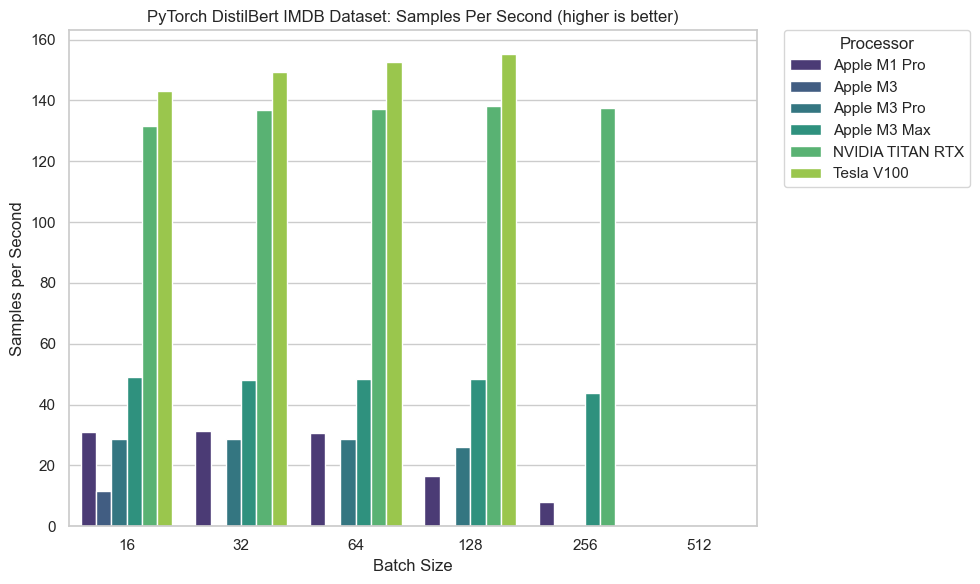

In [61]:
def plot_data_results(data,
                      x_col_to_plot,
                      y_col_to_plot,
                      title="PyTorch ResNet50 CIFAR100 Dataset: Batch Size vs Time per Epoch (lower is better)",
                      hue="processor",
                      palette="viridis",
                      xlabel="Batch Size",
                      ylabel="Average Time per Epoch (seconds)",
                      legend=True,
                      legend_loc="upper left",
                      legend_order=processor_order,
                      legend_title="Processor",
                      tight_layout=True,
                      save_plot=False,
                      plot_save_title=None):
    
    # Plot settings
    sns.set(style="whitegrid")

    # Plot for FOOD101 dataset
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_col_to_plot, 
                y=y_col_to_plot, 
                hue=hue, 
                data=data, 
                palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=legend_title, 
               loc=legend_loc)

    # Order the legend
    ax = plt.gca()

    # Extract handles and labels from legend
    handles, labels = ax.get_legend_handles_labels()

    # Create a dictionary mapping from label to handle
    label_to_handle = dict(zip(labels, handles))

    # Reorder handles using the new order of labels
    ordered_handles = [label_to_handle[label] for label in legend_order if label in label_to_handle]
    
    if legend:
        # Create the new legend
        plt.legend(ordered_handles, 
                    legend_order, 
                    title=legend_title, 
                    loc=legend_loc,
                    bbox_to_anchor=(1.04, 1), 
                    borderaxespad=0)
        
    # If tight layout, set it
    if tight_layout:
        plt.tight_layout()

    # Save plot
    if save_plot:
        save_path = Path("results/")
        save_path.mkdir(parents=True, exist_ok=True)
        if plot_save_title is None:
            plt.savefig(f"results/{title}.png", bbox_inches="tight")
        else:
            plt.savefig(f"results/{plot_save_title}.png", bbox_inches="tight")

    plt.show()

# Plot train samples per second
import matplotlib.pyplot as plt
import seaborn as sns

plot_data_results(data=pytorch_results_nlp_df,
                 x_col_to_plot="batch_size",
                 y_col_to_plot="train_samples_per_second",
                 title="PyTorch DistilBert IMDB Dataset: Samples Per Second (higher is better)",
                 hue="processor",
                 palette="viridis",
                 xlabel="Batch Size",
                 ylabel="Samples per Second",
                 legend_loc="upper left",
                 legend_order=processor_order,
                 legend_title="Processor",
                 tight_layout=True,
                 save_plot=True,
                 plot_save_title="pytorch_nlp_distilbert_imdb")

In [51]:
# PyTorch CV CIFAR100

# Get all csv files in PyTorch CV results directory
pytorch_results_cv_files = sorted(list(results_pytorch_cv.glob("*.csv")))

# Open each csv file as a DataFrame and add the name of processor to the DataFrame
pytorch_results_cv_dfs = []
for file in pytorch_results_cv_files:
    df = pd.read_csv(file)
    if "CIFAR100" in str(file.stem):
        df["dataset"] = "CIFAR100"
        df["processor"] = str(file.stem).split("CIFAR100")[0].replace("_", " ").strip().split("-")[0].strip()

    if "FOOD101" in str(file.stem):
        df["dataset"] = "FOOD101"
        df["processor"] = str(file.stem).split("FOOD101")[0].replace("_", " ").strip().split("-")[0].strip()

    pytorch_results_cv_dfs.append(df)

# Combine all csv files into one dataframe
pytorch_results_cv_df = pd.concat(
    pytorch_results_cv_dfs, ignore_index=True
)

# Get the processors in specific order
# Convert the 'processor' column to a categorical type with the specified order
pytorch_results_cv_df = sort_df_by_target_column(pytorch_results_cv_df, targ_column="processor", targ_order=processor_order)

# Replace values in avg_time_per_epoch column with None if they == "FAILED"
pytorch_results_cv_df = replace_failed_row_value_with_targ_value(pytorch_results_cv_df, 
                                                                  col_name="avg_time_per_epoch", 
                                                                  targ_value=0.0)

pytorch_results_cv_df

,batch_size,avg_time_per_epoch,dataset,processor
0,16,383.19,CIFAR100,Apple M1 Pro
1,32,225.42,CIFAR100,Apple M1 Pro
2,64,153.70,CIFAR100,Apple M1 Pro
3,128,121.98,CIFAR100,Apple M1 Pro
4,256,116.22,CIFAR100,Apple M1 Pro
5,512,113.35,CIFAR100,Apple M1 Pro
6,1024,110.80,CIFAR100,Apple M1 Pro
7,32,1266.55,FOOD101,Apple M1 Pro
8,64,1200.80,FOOD101,Apple M1 Pro
9,128,1186.38,FOOD101,Apple M1 Pro


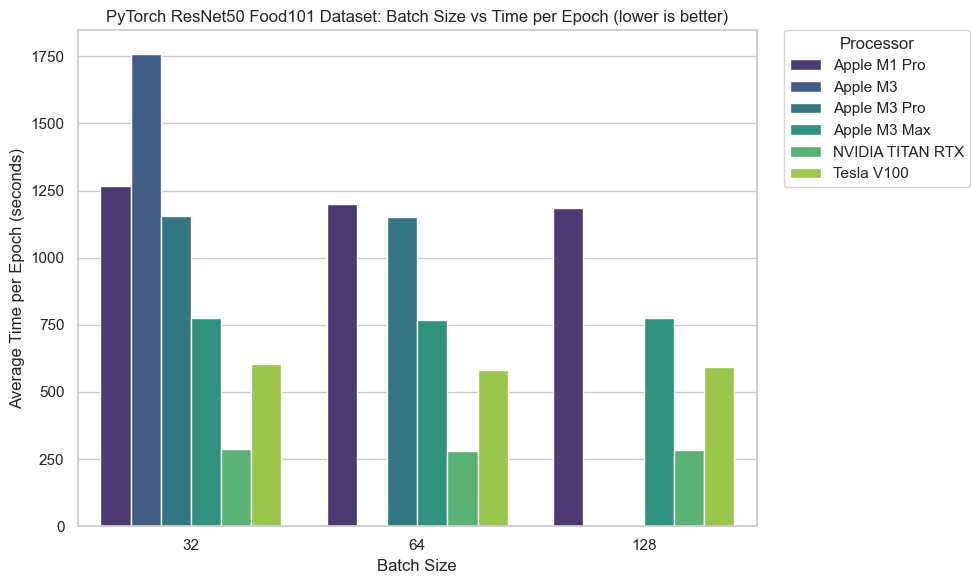

In [52]:
# Separate data for FOOD101 and CIFAR100
pytorch_cv_food101_data = pytorch_results_cv_df[pytorch_results_cv_df["dataset"] == "FOOD101"]
pytorch_cv_cifar100_data = pytorch_results_cv_df[pytorch_results_cv_df["dataset"] == "CIFAR100"]

# Plot for FOOD101 dataset
plot_data_results(data=pytorch_cv_food101_data,
                  x_col_to_plot="batch_size",
                  y_col_to_plot="avg_time_per_epoch",
                  title="PyTorch ResNet50 Food101 Dataset: Batch Size vs Time per Epoch (lower is better)",
                  hue="processor",
                  palette="viridis",
                  xlabel="Batch Size",
                  ylabel="Average Time per Epoch (seconds)",
                  legend_loc="upper left",
                  legend_order=processor_order,
                  legend_title="Processor",
                  save_plot=True,
                  plot_save_title="pytorch_cv_resnet50_food101")

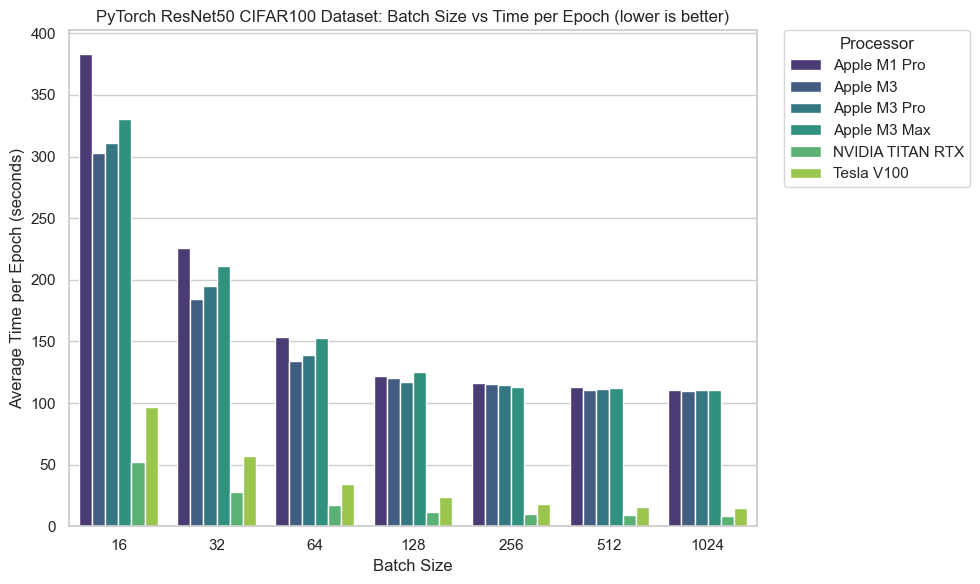

In [53]:
# Plot results for CIFAR100 dataset
plot_data_results(data=pytorch_cv_cifar100_data,
                  x_col_to_plot="batch_size",
                  y_col_to_plot="avg_time_per_epoch",
                  title="PyTorch ResNet50 CIFAR100 Dataset: Batch Size vs Time per Epoch (lower is better)",
                  hue="processor",
                  palette="viridis",
                  xlabel="Batch Size",
                  ylabel="Average Time per Epoch (seconds)",
                  legend_loc="upper left",
                  legend_order=processor_order,
                  legend_title="Processor",
                  save_plot=True,
                  plot_save_title="pytorch_cv_resnet50_cifar100")

## TensorFlow Results

In [54]:
# TensorFlow NLP

# Get all csv files in TensorFlow NLP results directory
tensorflow_results_nlp_files = list(results_tensorflow_nlp.glob("*.csv"))

# Open each csv file as a DataFrame and add the name of processor to the DataFrame
tensorflow_results_nlp_dfs = []
for file in tensorflow_results_nlp_files:
    df = pd.read_csv(file)
    df["processor"] = str(file.stem).split("IMDB")[0].replace("_", " ").strip().split("-")[0].strip()
    tensorflow_results_nlp_dfs.append(df)

# Combine all csv files into one dataframe
tensorflow_results_nlp_df = pd.concat(
    tensorflow_results_nlp_dfs, ignore_index=True
)

# Order the processor column
tensorflow_results_nlp_df = sort_df_by_target_column(tensorflow_results_nlp_df, targ_column="processor", targ_order=processor_order)

# Turn avg_time_per_epoch column into float
tensorflow_results_nlp_df["avg_time_per_epoch"] = tensorflow_results_nlp_df["avg_time_per_epoch"].astype(float).round(2)
tensorflow_results_nlp_df

,batch_size,avg_time_per_epoch,processor
0,16,211.15,Apple M1 Pro
1,32,182.09,Apple M1 Pro
2,64,178.21,Apple M1 Pro
3,128,172.25,Apple M1 Pro
4,128,161.16,Apple M3
5,64,155.95,Apple M3
6,32,162.64,Apple M3
7,16,186.32,Apple M3
8,128,132.48,Apple M3 Pro
9,32,150.77,Apple M3 Pro


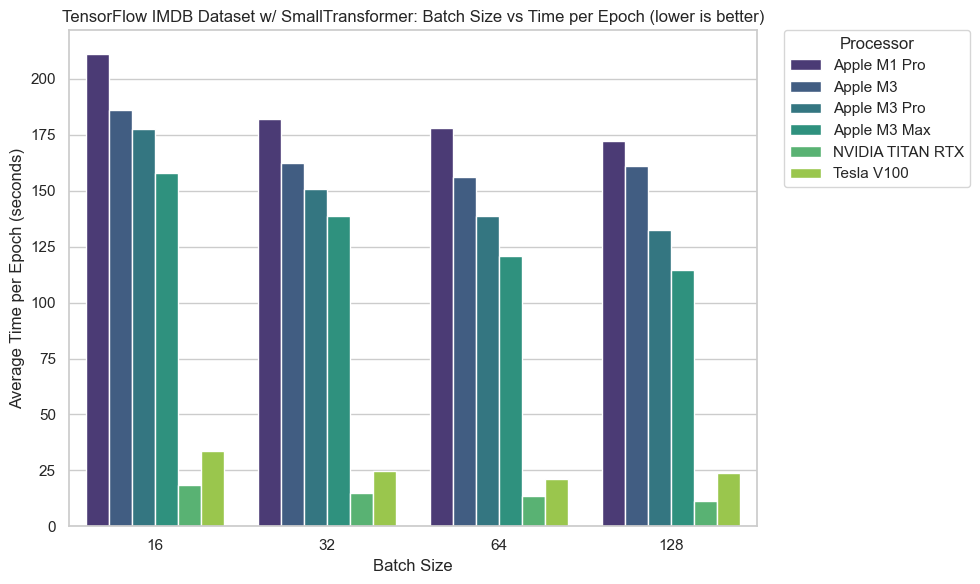

In [55]:
# Plot the TensorFlow NLP results
plot_data_results(data=tensorflow_results_nlp_df,
                  x_col_to_plot="batch_size",
                  y_col_to_plot="avg_time_per_epoch",
                  title="TensorFlow IMDB Dataset w/ SmallTransformer: Batch Size vs Time per Epoch (lower is better)",
                  hue="processor",
                  palette="viridis",
                  xlabel="Batch Size",
                  ylabel="Average Time per Epoch (seconds)",
                  legend_loc="upper left",
                  legend_order=processor_order,
                  legend_title="Processor",
                  save_plot=True,
                  plot_save_title="tensorflow_nlp_imdb")

In [56]:
# TensorFlow CV

# Get all csv files in TensorFlow CV results directory
tensorflow_results_cv_files = list(results_tensorflow_cv.glob("*.csv"))

# Open each csv file as a DataFrame and add the name of processor to the DataFrame
tensorflow_results_cv_dfs = []
for file in tensorflow_results_cv_files:
    df = pd.read_csv(file)
    if "CIFAR100" in str(file.stem):
        df["dataset"] = "CIFAR100"
        df["processor"] = str(file.stem).split("CIFAR100")[0].replace("_", " ").strip().split("-")[0].strip()

    if "FOOD101" in str(file.stem):
        df["dataset"] = "FOOD101"
        df["processor"] = str(file.stem).split("FOOD101")[0].replace("_", " ").strip().split("-")[0].strip()

    tensorflow_results_cv_dfs.append(df)

# Combine all csv files into one dataframe
tensorflow_results_cv_df = pd.concat(
    tensorflow_results_cv_dfs, ignore_index=True
)

# Order the processor column
tensorflow_results_cv_df = sort_df_by_target_column(tensorflow_results_cv_df, targ_column="processor", targ_order=processor_order)

# Replace values in avg_time_per_epoch column with None if they == "FAILED"
tensorflow_results_cv_df = replace_failed_row_value_with_targ_value(tensorflow_results_cv_df, 
                                                                    col_name="avg_time_per_epoch", 
                                                                    targ_value=0.0)

tensorflow_results_cv_df = tensorflow_results_cv_df.dropna()
tensorflow_results_cv_df

,batch_size,avg_time_per_epoch,dataset,processor
0,32,100.49,CIFAR100,Apple M1 Pro
1,128,926.64,FOOD101,Apple M1 Pro
2,64,938.93,FOOD101,Apple M1 Pro
3,32,987.39,FOOD101,Apple M1 Pro
4,64,57.73,CIFAR100,Apple M1 Pro
5,128,47.85,CIFAR100,Apple M1 Pro
6,256,45.07,CIFAR100,Apple M1 Pro
7,512,44.34,CIFAR100,Apple M1 Pro
8,1024,43.35,CIFAR100,Apple M1 Pro
9,16,184.64,CIFAR100,Apple M1 Pro


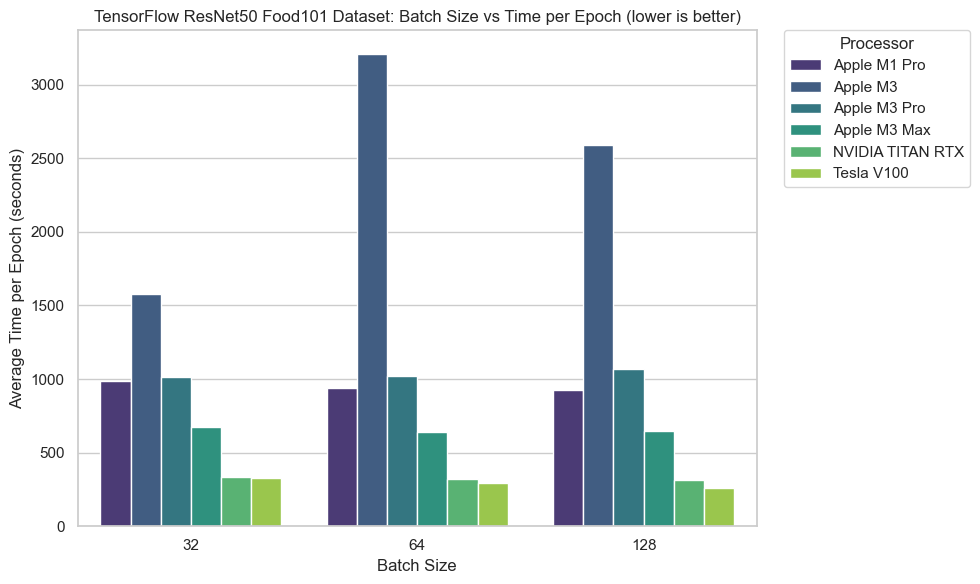

In [57]:
# Separate data for FOOD101 and CIFAR100
tensorflow_cv_food101_data = tensorflow_results_cv_df[tensorflow_results_cv_df["dataset"] == "FOOD101"]
tensorflow_cv_cifar100_data = tensorflow_results_cv_df[tensorflow_results_cv_df["dataset"] == "CIFAR100"]

# Plot for FOOD101 dataset
plot_data_results(data=tensorflow_cv_food101_data,
                  x_col_to_plot="batch_size",
                  y_col_to_plot="avg_time_per_epoch",
                  title="TensorFlow ResNet50 Food101 Dataset: Batch Size vs Time per Epoch (lower is better)",
                  hue="processor",
                  palette="viridis",
                  xlabel="Batch Size",
                  ylabel="Average Time per Epoch (seconds)",
                  legend_loc="upper left",
                  legend_order=processor_order,
                  legend_title="Processor",
                  save_plot=True,
                  plot_save_title="tensorflow_cv_resnet50_food101")

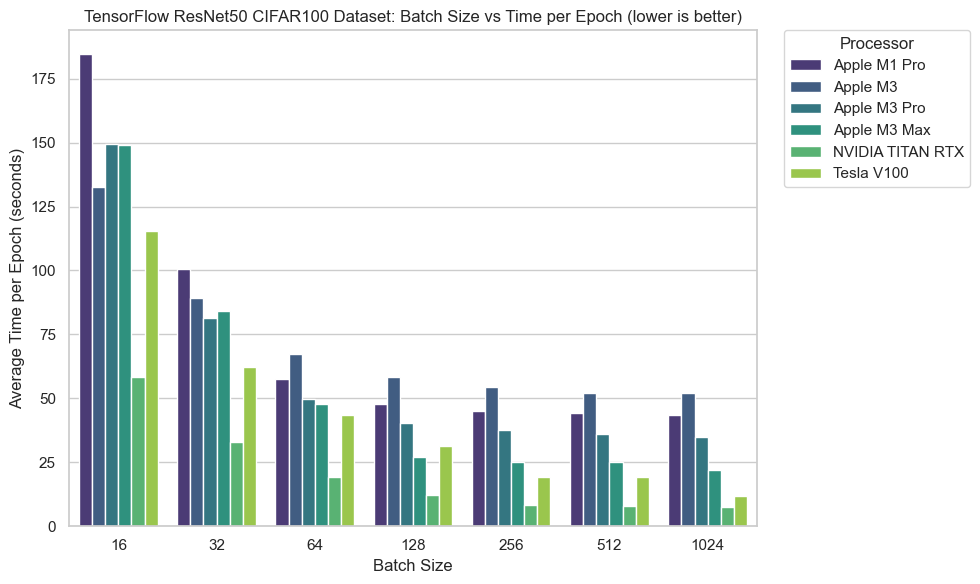

In [58]:
# Plot for CIFAR100 dataset
plot_data_results(data=tensorflow_cv_cifar100_data,
                  x_col_to_plot="batch_size",
                  y_col_to_plot="avg_time_per_epoch",
                  title="TensorFlow ResNet50 CIFAR100 Dataset: Batch Size vs Time per Epoch (lower is better)",
                  hue="processor",
                  palette="viridis",
                  xlabel="Batch Size",
                  ylabel="Average Time per Epoch (seconds)",
                  legend_loc="upper left",
                  legend_order=processor_order,
                  legend_title="Processor",
                  save_plot=True,
                  plot_save_title="tensorflow_cv_resnet50_cifar100")

## Llama Results

In [59]:
## Llama results

# Get all csv files in Llama results directory
llama_results_files = list(results_llama.glob("*.csv"))

# Open each csv file as a DataFrame and add the name of processor to the DataFrame
llm_model_name = "llama-2-7b-chat.Q4_0.gguf"

llama_results_dfs = []
for file in llama_results_files:
    df = pd.read_csv(file)
    df["processor"] = str(file.stem).split(llm_model_name)[0].replace("_", " ").strip()
    llama_results_dfs.append(df)

# Combine all csv files into one dataframe
llama_results_df = pd.concat(
    llama_results_dfs, ignore_index=True
)

# Order the processor column
llama_results_df = sort_df_by_target_column(llama_results_df, targ_column="processor", targ_order=["Apple M1 Pro", "Apple M3", "Apple M3 Pro", "Apple M3 Max"])

# Group by the processor and then get the mean tokens_per_second
mean_tokens_per_second = pd.DataFrame(llama_results_df.groupby(["processor"])["tokens_per_second"].mean()).reset_index()
mean_tokens_per_second

/var/folders/c4/qj4gdk190td18bqvjjh0p3p00000gn/T/ipykernel_75501/1651116563.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_tokens_per_second = pd.DataFrame(llama_results_df.groupby(["processor"])["tokens_per_second"].mean()).reset_index()


,processor,tokens_per_second
0,Apple M1 Pro,34.1110
1,Apple M3,20.8551
2,Apple M3 Pro,29.3163
3,Apple M3 Max,47.5658


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


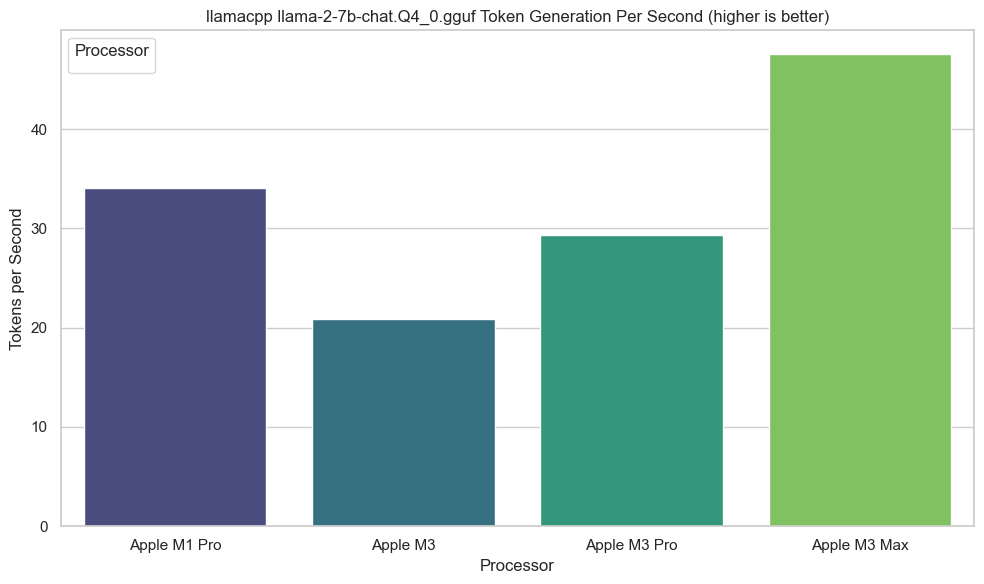

In [60]:
# Plot for Llama results
plot_data_results(data=mean_tokens_per_second,
                  x_col_to_plot="processor",
                  y_col_to_plot="tokens_per_second",
                  title=f"llamacpp {llm_model_name} Token Generation Per Second (higher is better)",
                  hue="processor",
                  palette="viridis",
                  xlabel="Processor",
                  ylabel="Tokens per Second",
                  legend=False,
                  legend_loc="upper left",
                  legend_order=['Apple M1 Pro', 'Apple M3', 'Apple M3 Pro', 'Apple M3 Max'],
                  legend_title="Processor",
                  tight_layout=True,
                  save_plot=True,
                  plot_save_title="llamacpp_2_7b_chat_q4_0_gguf_tokens_per_second")